### Importing the libraries.

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the datasets.

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### Cleaning the data

In [3]:
observations = observations.drop_duplicates()
species = species.drop_duplicates()

### Creating a dataset with each park the total area (km²).

In [4]:
# Creating a new dataset.
data = [('Great Smoky Mountains National Park', 2144.10), ('Yosemite National Park', 3027.81),('Bryce National Park', 1342.57),('Yellowstone National Park', 8983.18)]
park_area = pd.DataFrame(data, columns=["park_name", "area_(km²)"])

# The data was provided by ChatGPT.

### Getting the total area of the parks combined.

In [5]:
# Summing the total area of the four parks
total_area = park_area['area_(km²)'].sum()
print(f'Total area: {total_area}km²')

Total area: 15497.66km²


#### The four parks have a total area of 15497.66km².

### Joining the observations with the species dataset.

In [6]:
# Joining the observations with the species dataset.
outer = observations.merge(species, on = 'scientific_name', how = 'outer')

# Dorpping the plants categories from the dataset
criteria1 = outer['category'] == 'Vascular Plant'
outer = outer.drop(outer[criteria1].index) 

criteria2 = outer['category'] == 'Nonvascular Plant'
outer = outer.drop(outer[criteria2].index)

### Counting the total mammal observations among the four pakrs.

In [7]:
# Grouping the data to get the sum of mammal observations.
total_mammal_obs = outer[outer.category == 'Mammal'].groupby('category')['observations'].sum().reset_index()

# Transforming the total_mammal_obs in a df. 
m_obs_result = pd.DataFrame(total_mammal_obs)

print(f'Total observations: {m_obs_result.iloc[0,1]}')

Total observations: 162608


#### Was recored 162608 observations of mammals in the four parks combined.

### Encountering the general mammal population density among the four parks combined.

In [9]:
# Isoleting the sum of observations from total_mammal_obs.
t_m_obs =  m_obs_result.iloc[0,1]

# Calculating the general mammal density.
general_m_density = round((t_m_obs / total_area),2)
print(f'General mammal density: {general_m_density}')

General mammal density: 10.49


### Joining the park_area dataset with the outer dataset.

In [13]:
# Joining the tables.
outer_area = outer.merge(park_area, on ='park_name', how = 'outer')

#### Now each park has the indication of its area in km².

### Counting the total number of mammals on each park and checking the density of its population by km².

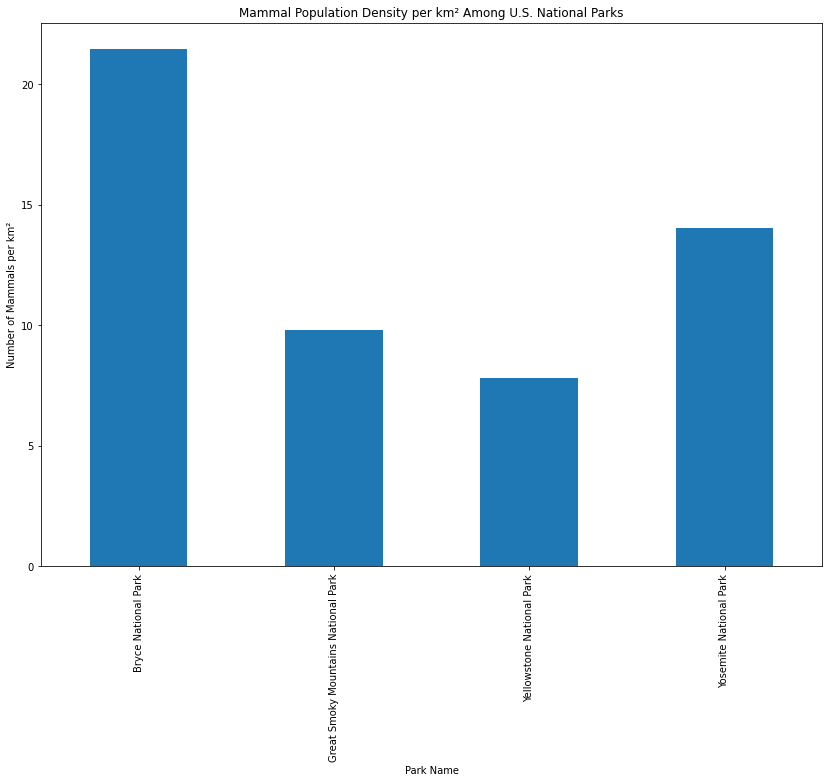

In [16]:
# Grouping the data to show the total population of mammals in each park and its total area.
outer_density = outer_area[outer_area.category == 'Mammal'].groupby(['park_name','area_(km²)', 'category'])['observations'].sum().reset_index().rename(columns ={'observations':'total_observations'})

# Chenging the outer_density to a df. 
outer_density = pd.DataFrame(outer_density)

# Finding the mammal population density for each park.
outer_density['population_density'] = outer_density['total_observations'] / outer_density['area_(km²)']
# print(outer_density)

# Plotting a bar chart to analyze the mammal population density by each park. 
ax = outer_density['population_density'].plot(kind = 'bar', figsize = (14,10))
ax = plt.gca()
ax.set_xticklabels(outer_density['park_name'])
plt.xlabel('Park Name')
plt.ylabel('Number of Mammals per km²')
plt.title('Mammal Population Density per km² Among U.S. National Parks')
plt.show()

#### Though the Yellowstone national park is the one with the biggest number mammals observations registered the Bryce National is the US national park with the higher probability of observing mammals as it is the park with a higher mammal population density.